# Story Title
## By: Group Members

## Introduction (Draft/Rough Outline)

Prologue: MLB pitcher success is an important topic BECAUSE (give significance)
There are certain factors which contribute and correlate to success. We are on a mission to identify those factors. 
Luckily, baseball is a data-rich sport (baseball savant); this ample data gives us the opportunity to identify trends among various pitcher types.

The Set-Up:
Pitchers in Major League Baseball can be classified in three ways: starters, relievers, and closers. 

For those less familiar with baseball the Group 3 Times has provided the following definitions:
A starter - pitches every 5 days, usually throws 80-100 pitches across 5 innings. 
Relievers - pitches every 2-3 days, usually throws 20-30 pitches across 1-2 innings. 
Closers - usually throws 10-20 pitches in 1 inning, the 9th inning. 

Naturally, these three pitcher types have variations in the results of their pitches. We seek to identify what leads each pitcher to success. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from IPython.display import HTML, Markdown, display
import seaborn as sns
import numpy as np
import shapely
import json
import plotly

## Load the Data

In [2]:
SP_df = pd.read_csv('../data/Project_Data_Files/Project_Starters.csv')
RP_df = pd.read_csv('../data/Project_Data_Files/Project_Relievers.csv')
CP_df = pd.read_csv('../data/Project_Data_Files/Project_Closers.csv')

SP_df.head()

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,...,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
0,2864,641816,"Mahle, Tyler",3196,89.6,0.234,0.157,0.313,0.391,0.307,...,1591,0.3,6.59,113,154,117,148,293,318,290
1,2706,656302,"Cease, Dylan",2957,91.5,0.225,0.136,0.313,0.361,0.296,...,1447,-0.6,6.03,111,152,112,149,300,321,296
2,2608,622491,"Castillo, Luis",3164,82.4,0.247,0.153,0.311,0.401,0.313,...,1328,-1.6,5.54,114,152,116,148,291,319,291
3,2566,640455,"Manaea, Sean",2980,86.1,0.256,0.157,0.324,0.414,0.309,...,1249,1.0,7.18,110,151,120,150,301,326,299
4,2530,605397,"Musgrove, Joe",2938,86.1,0.224,0.164,0.283,0.388,0.297,...,1348,-0.8,5.91,114,153,133,143,298,321,310


## Pitcher Type Data Analysis 

Factors we’re going to look at within and compare within each dataset:

* Jonah’s Relationship/Correlation Finding__
* Horizontal Release Point and Exit Velocity
* Velocity and Whiffs

***TEAM NOTE: IF YOU SEE OTHER TRENDS , NOTE THEM***

### Block 1: Jonah/Starters

Write a blurb about starters 

In [3]:
"""
Looking at Starters
    Run starter dataset through code
Looking at Relievers
    Run reliever dataset through code
Looking at Closers
    Run closer dataset through code 
""" 

'\nLooking at Starters\n    Run starter dataset through code\nLooking at Relievers\n    Run reliever dataset through code\nLooking at Closers\n    Run closer dataset through code \n'

#### Compare all three
* Which one has the best correlation?
* What gives way to more success?
* Who are the outliers?

#### Take-Away(s)
* Trend 1 
* Trend 2

### Block 2: Relievers/Hadriana (Horizontal Release Point)

Write a blurb about relievers 

In [4]:
"""
Looking at Starters
    Run starter dataset through code
Looking at Relievers
    Run reliever dataset through code
Looking at Closers
    Run closer dataset through code 
""" 

'\nLooking at Starters\n    Run starter dataset through code\nLooking at Relievers\n    Run reliever dataset through code\nLooking at Closers\n    Run closer dataset through code \n'

#### Compare all three
* Which one has the best correlation?
* What gives way to more success?
* Who are the outliers?

#### Take-Away(s)
* Relievers who release the ball horizontally between 3-4 feet give results to weaker contact by almost a full 2 miles per hour slower than 0-1 feet
* Other trends?

### Block 3: Closers/John (Velocity & Whiffs)

Write a blurb about closers 

In [5]:
"""
Looking at Starters
    Run starter dataset through code
Looking at Relievers
    Run reliever dataset through code
Looking at Closers
    Run closer dataset through code 
""" 

'\nLooking at Starters\n    Run starter dataset through code\nLooking at Relievers\n    Run reliever dataset through code\nLooking at Closers\n    Run closer dataset through code \n'

#### Compare all three
* Which one has the best correlation?
* What gives way to more success?
* Who are the outliers?

#### Take-Away(s)
* Highest correlation between velocity and whiffs exist within closers
* Other trends?

## The Plot Thickens: Player Data Analysis

What’s making them successful cause it’s not what usually makes their pitcher type successful?
How are they defying the trend and still successful?

***RUN EACH OF THESE TESTS FOR EACH PLAYER***
Template for metrics to check in on:
EX: _____ → Thus this could potentially be the reason making him successful despite being unique. 

***USE SAM AND KATIE’S NOTEBOOK’S AS REFERENCE***

Outlying Players:
_____ (Starter)
_____ (Starter)
_____ (Starter)
Sergio Romo (?) (Reliever)
_____ (Reliever)
Tyler Rogers (Reliever)
Aroldis Chapman (Closer)
Craig Kimbrel (Closer)
Kenley Jansen (Closer)

In [6]:
# Load player datasets

Chapman_df = pd.read_csv('../data/Project_Data_Files/Project_AroldisChapman.csv')
Jansen_df = pd.read_csv('../data/Project_Data_Files/Project_KenleyJansen.csv')
Romo_df = pd.read_csv('../data/Project_Data_Files/Project_SergioRomo.csv')
Rogers_df = pd.read_csv('../data/Project_Data_Files/Project_TylerRogers.csv')
Kimbrel_df = pd.read_csv('../data/Project_Data_Files/ProjectCraigKimbrel.csv')

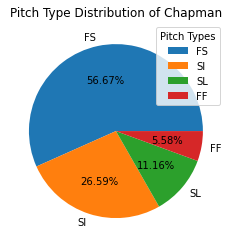

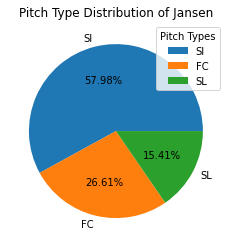

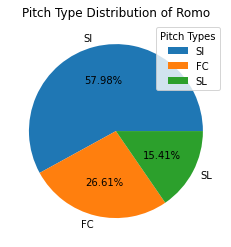

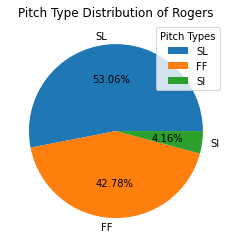

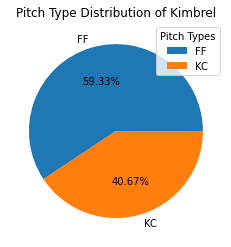

In [7]:
# Check pitch type [KATIE]

###########
# CHAPMAN #
###########
chap_pitch_type_vals = Chapman_df["pitch_type"].value_counts()
chap_pitch_types = Chapman_df["pitch_type"].unique()

chap_plot = plt.pie(chap_pitch_type_vals, labels = chap_pitch_types, autopct='%1.2f%%')
plt.title('Pitch Type Distribution of Chapman')
plt.legend(title = "Pitch Types")
plt.show()

##########
# JANSEN #
##########
jan_pitch_type_vals = Jansen_df["pitch_type"].value_counts()
jan_pitch_types = Jansen_df["pitch_type"].unique()

jan_plot = plt.pie(jan_pitch_type_vals, labels = jan_pitch_types, autopct='%1.2f%%')
plt.title('Pitch Type Distribution of Jansen')
plt.legend(title = "Pitch Types")
plt.show()

########
# ROMO #
########
romo_pitch_type_vals = Jansen_df["pitch_type"].value_counts()
romo_pitch_types = Jansen_df["pitch_type"].unique()

romo_plot = plt.pie(romo_pitch_type_vals, labels = romo_pitch_types, autopct='%1.2f%%')
plt.title('Pitch Type Distribution of Romo')
plt.legend(title = "Pitch Types")
plt.show()

##########
# ROGERS #
##########
rog_pitch_type_vals = Rogers_df["pitch_type"].value_counts()
rog_pitch_types = Rogers_df["pitch_type"].unique()

rog_plot = plt.pie(rog_pitch_type_vals, labels = rog_pitch_types, autopct='%1.2f%%')
plt.title('Pitch Type Distribution of Rogers')
plt.legend(title = "Pitch Types")
plt.show()

###########
# KIMBREL #
###########
kim_filter = Kimbrel_df['pitch_type'].isna() == False 
kim_df = Kimbrel_df[kim_filter]

kim_pitch_type_vals = kim_df["pitch_type"].value_counts()
kim_pitch_types = kim_df["pitch_type"].unique()

kim_plot = plt.pie(kim_pitch_type_vals, labels = kim_pitch_types, autopct='%1.2f%%')
plt.title('Pitch Type Distribution of Kimbrel')
plt.legend(title = "Pitch Types")
plt.show()

<div class="alert alert-warning">

#### Aaaaaaah! Lets not use pie charts for something like this!
  
* Although common there are very few places where pie charts communicate very clearly there are much better and more concise options
    
* Instead you can use a stacked bar plot with one column per player
    

  
</div>

In [39]:

players = ['Chapman', 'Jansen', 'Romo', 'Rogers', 'Kimbrel']
player_dfs = [Chapman_df, Jansen_df, Romo_df, Rogers_df, Kimbrel_df]

pitch_data = []
for player, pdf in zip(players, player_dfs):
        df=pdf["pitch_type"].value_counts(normalize=True).to_frame()
        df['player']=player
        pitch_data.append(df)

pitch_data_df = pd.concat(pitch_data)

pitch_data_df=pitch_data_df.reset_index()
pitch_data_df.rename(columns={'index': 'pitch_type',
                              'pitch_type': 'value'}, inplace=True)


In [40]:
pitch_by_player=pitch_data_df.pivot(index='player', columns='pitch_type', values='value')

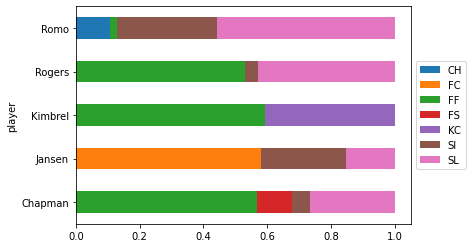

In [44]:
pitch_by_player.plot(kind='barh', 
                     stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

6.07    40
6.08    40
6.05    37
6.11    37
6.06    36
        ..
6.42     1
6.38     1
6.44     1
5.82     1
5.79     1
Name: release_pos_z, Length: 62, dtype: int64


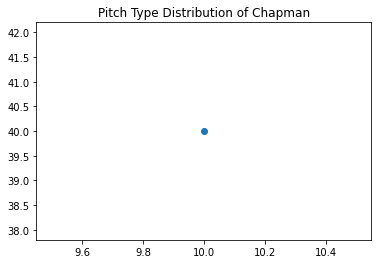

In [135]:
# Check vertical release point - Katie

###########
# CHAPMAN #
###########
chap_release_vals = Chapman_df["release_pos_z"].value_counts()
chap_release_types = Chapman_df["release_pos_z"].unique()
print(chap_release_vals)
chap_plot = plt.scatter(x=10, y=40, data=chap_release_vals)
plt.title('Pitch Type Distribution of Chapman')
#plt.legend(title = "Pitch Types")
plt.show()

In [ ]:
# Strike throwing percentage - Sam

In [15]:
# Length of at-bat - Sam

## Conclusion 

Conclusion here

In [45]:
ls -l

total 12896
-rw-rw-rw- 1 hlowenkron    hlowenkron    6422864 Nov 15 22:29 'Data collection and initial exploration.ipynb'
-rw-rw-rw- 1 katie-collier katie-collier  120815 Dec  1 18:50 'Final Cleaned Notebook.ipynb'
-rw-rw-rw- 1 hlowenkron    hlowenkron      55414 Nov 24 15:19 'Hadriana - Assignment Step 2.ipynb'
-rw-rw-rw- 1 hlowenkron    hlowenkron     189520 Nov 18 21:21 'Hadriana - Relief data collection and initial exploration.ipynb'
-rw-rw-rw- 1 jreum7        jreum7          74728 Nov 24 06:21 'John Reum - Assignment Step 2.ipynb'
-rw-rw-rw- 1 jreum7        jreum7        3857605 Nov 24 06:07 'John Reum - Closers data collection and initial exploration.ipynb'
-rw-rw-rw- 1 jonahcharlton jonahcharlton  456581 Nov 22 21:51 'Jonah - Starters data collection and initial exploration.ipynb'
-rw-rw-rw- 1 katie-collier katie-collier 1543188 Nov 18 19:25 'Katie - PlayerData (Ralph) - Data collection and initial exploration.ipynb'
-rw-rw-rw- 1 katie-collier katie-collier   40529 Nov 23 00:57 